In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
import pickle

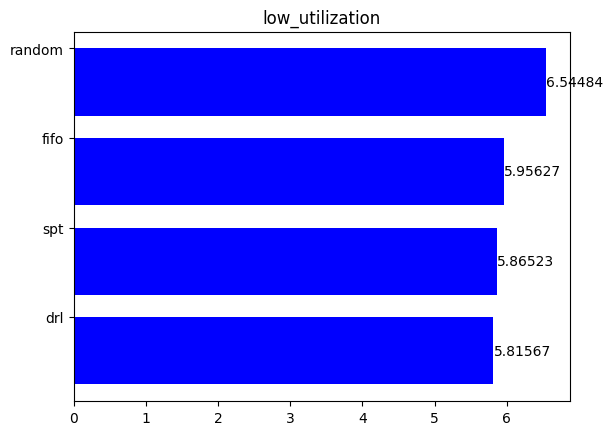

ppo 5.8 (0.1)
svfa 5.6 (0.08)
spt 5.9 (0.09)
fifo 6.0 (0.11)
random 6.5 (0.13)
RLRAM 1011.8 (14.15)
DDQN 2383.5 (18.75)
Park and song 6.0 (0.09)


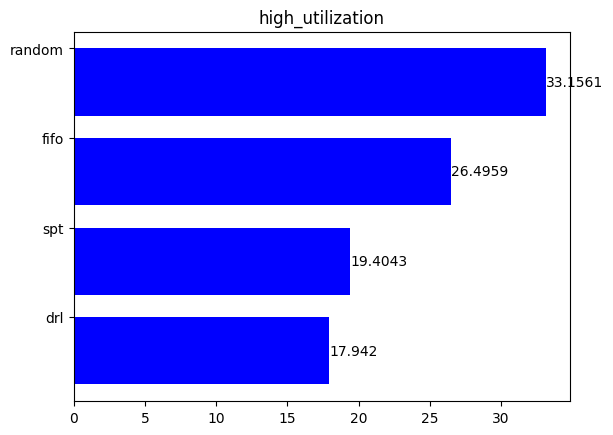

ppo 17.9 (0.72)
svfa 18.1 (0.94)
spt 19.4 (0.96)
fifo 26.5 (1.86)
random 33.2 (3.07)
RLRAM 1481.0 (11.94)
DDQN 2501.2 (4.83)
Park and song 19.4 (1.01)


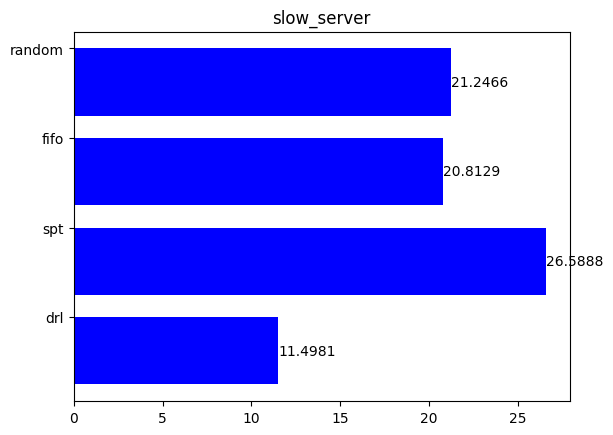

ppo 11.5 (0.33)
svfa 11.4 (0.31)
spt 26.6 (1.88)
fifo 20.8 (1.86)
random 21.2 (1.25)
RLRAM 1042.2 (13.62)
DDQN 58.9 (5.6)
Park and song 20.5 (1.26)


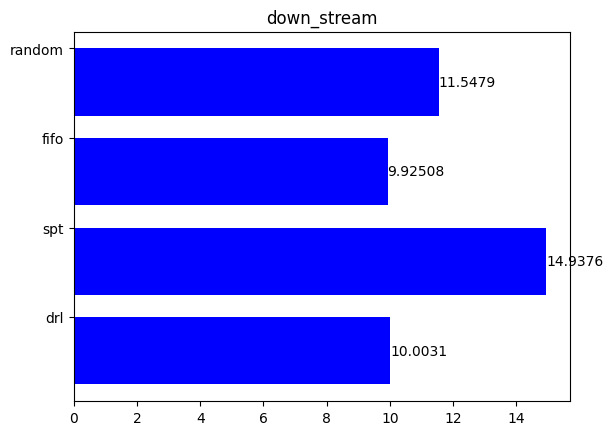

ppo 10.0 (0.35)
svfa 9.6 (0.25)
spt 14.9 (0.61)
fifo 9.9 (0.32)
random 11.5 (0.39)
RLRAM 1274.0 (12.38)
DDQN 2499.9 (6.51)
Park and song 14.7 (0.59)


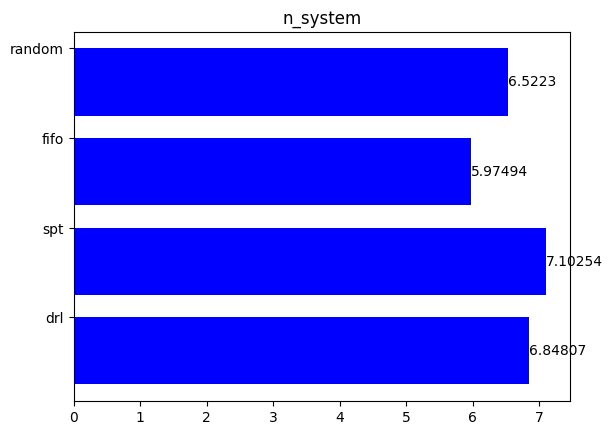

ppo 6.8 (0.2)
svfa 5.7 (0.09)
spt 7.1 (0.21)
fifo 6.0 (0.12)
random 6.5 (0.15)
RLRAM 19.1 (0.35)
DDQN 6.7 (0.11)
Park and song 6.3 (0.14)


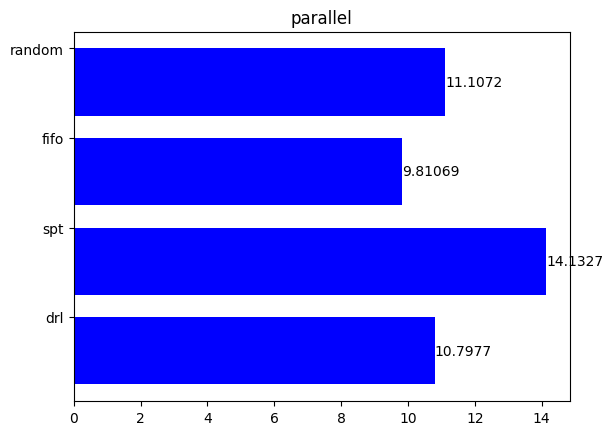

ppo 10.8 (0.37)
svfa 12.0 (0.38)
spt 14.1 (0.6)
fifo 9.8 (0.35)
random 11.1 (0.49)
RLRAM 1033.4 (10.06)
DDQN 2495.9 (5.45)
Park and song 13.7 (0.6)


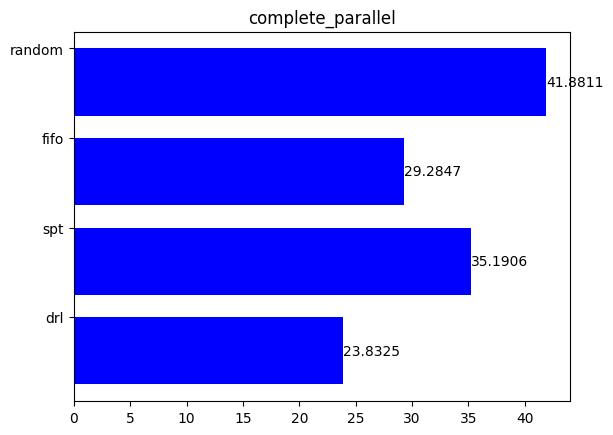

ppo 23.8 (0.99)
svfa 34.1 (1.29)
spt 35.2 (1.71)
fifo 29.3 (1.73)
random 41.9 (3.99)
RLRAM 1036.5 (12.37)
DDQN 2504.8 (5.29)


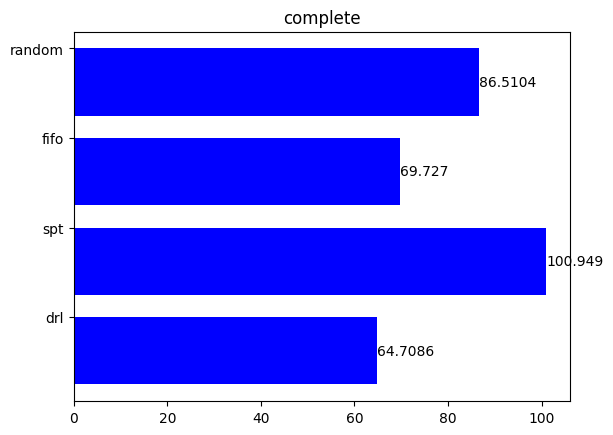

ppo 64.7 (2.63)
svfa 72.1 (2.34)
spt 100.9 (4.07)
fifo 69.7 (3.5)
random 86.5 (4.12)
RLRAM 1432.5 (12.73)
DDQN 2502.6 (6.25)


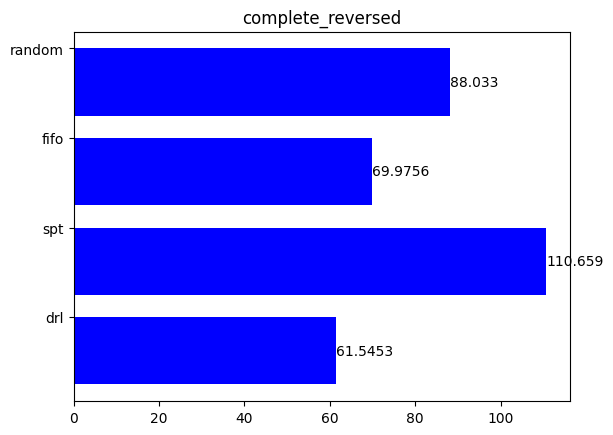

ppo 61.5 (1.5)
svfa 73.6 (2.44)
spt 110.7 (4.77)
fifo 70.0 (3.7)
random 88.0 (4.53)
RLRAM 1307.3 (11.16)
DDQN 2498.4 (6.16)


In [34]:
with open(f'results_svfa/raw_res.pkl', 'rb') as f:
    svfa_all = pickle.load(f)

for model_name in ['low_utilization', 'high_utilization', 'slow_server', 'down_stream', 'n_system', 'parallel', 'complete_parallel', 'complete', 'complete_reversed']:#, 'complete', 'complete_reversed', 'complete_parallel']:
    drl = pd.read_csv(f'results_revision/results_PPO/PPO_{model_name}_0.5.txt')['mean_cycle_time']
    if model_name != 'low_utilization':
        svfa = svfa_all[model_name]
    else:
        svfa = svfa_all['low_utilitzation']
    spt = pd.read_csv(f'results_revision/results_SPT/ShortestProcessingTime_{model_name}_0.5.txt')['mean_cycle_time']
    fifo = pd.read_csv(f'results_revision/results_FIFO/FIFO_{model_name}_0.5.txt')['mean_cycle_time']
    random = pd.read_csv(f'results_revision/results_random//Random_{model_name}_0.5.txt')['mean_cycle_time']

    
    dqn = pd.read_csv(f'results/DDQN_{model_name}.txt')['mean_cycle_time']
    rlram = pd.read_csv(f'results/RLRAM_{model_name}.txt')['mean_cycle_time']
    
    labels = ['drl', 'spt', 'fifo', 'random']
    data = [drl.mean(), spt.mean(), fifo.mean(), random.mean()]
    
    fig, ax = plt.subplots()    
    width = 0.75 # the width of the bars 
    ind = np.arange(len(data))  # the x locations for the groups
    bars = ax.barh(ind, data, width, color="blue")
    ax.set_yticks(ind+width/2)
    ax.set_yticklabels(labels, minor=False)
    plt.title(model_name)


    ax.bar_label(bars)  
    plt.show()

    print('ppo', f'{np.round(np.mean(drl),1)} ({np.round(1.96*(np.std(drl)/np.sqrt(len(drl))),2)})')
    print('svfa', f'{np.round(np.mean(svfa),1)} ({np.round(1.96*(np.std(svfa)/np.sqrt(len(svfa))),2)})')
    print('spt', f'{np.round(np.mean(spt),1)} ({np.round(1.96*(np.std(spt)/np.sqrt(len(spt))),2)})')
    print('fifo', f'{np.round(np.mean(fifo),1)} ({np.round(1.96*(np.std(fifo)/np.sqrt(len(fifo))),2)})')
    print('random', f'{np.round(np.mean(random),1)} ({np.round(1.96*(np.std(random)/np.sqrt(len(random))),2)})')
    print('RLRAM', f'{np.round(np.mean(rlram),1)} ({np.round(1.96*(np.std(rlram)/np.sqrt(len(rlram))),2)})') 
    print('DDQN', f'{np.round(np.mean(dqn),1)} ({np.round(1.96*(np.std(dqn)/np.sqrt(len(dqn))),2)})')
    if model_name not in ['complete', 'complete_reversed', 'complete_parallel']:
        parkSong = pd.read_csv(f'results/ParkSong_{model_name}.txt')['mean_cycle_time']
        print('Park and song', f'{np.round(np.mean(parkSong),1)} ({np.round(1.96*(np.std(parkSong)/np.sqrt(len(parkSong))),2)})') 
    
    
    #plt.show()






In [35]:
from scipy import stats
#for model_name in ['n_system', 'down_stream', 'high_utilization', 'low_utilization', 'slow_server', 'parallel', 'complete', 'complete_reversed', 'complete_parallel']:

model_name = 'complete'
drl = pd.read_csv(f'results_revision/results_PPO/PPO_{model_name}_0.5.txt')['mean_cycle_time']

with open(f'results_svfa/raw_res.pkl', 'rb') as f:
    svfa_all = pickle.load(f)

if model_name != 'low_utilization':
    svfa = svfa_all[model_name]
else:
    svfa = svfa_all['low_utilitzation']
spt = pd.read_csv(f'results_revision/results_SPT/ShortestProcessingTime_{model_name}_0.5.txt')['mean_cycle_time']
fifo = pd.read_csv(f'results_revision/results_FIFO/FIFO_{model_name}_0.5.txt')['mean_cycle_time']
random = pd.read_csv(f'results_revision/results_random//Random_{model_name}_0.5.txt')['mean_cycle_time']
if model_name not in ['complete', 'complete_reversed', 'complete_parallel']:
    parkSong = pd.read_csv(f'results/ParkSong_{model_name}.txt')['mean_cycle_time']


models = [drl, fifo]
print(np.mean(models[0]), np.mean(models[1]))
stats.ttest_ind(models[0], models[1])  

64.70856222178338 69.72704565300666


TtestResult(statistic=-2.2380781868685142, pvalue=0.02632972676044782, df=198.0)